# Inference

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.ndimage as spi
import matplotlib.pyplot as plt
import imageio as iio
from src.inference.classify import classify
import os
import sys
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2
import tensorflow as tf

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (14,6)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

### Clasify Image on the File System

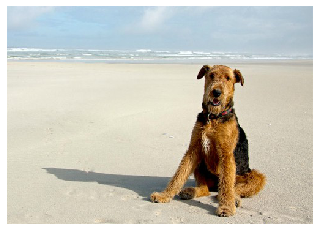

In [2]:
image_path = 'images/airedale.jpg'

img = plt.imshow(iio.imread(image_path))
img.set_cmap('hot')
_ = plt.axis('off')

In [ ]:
probs = classify('files', 'images/airedale.jpg')

W1207 03:27:21.234324 140045179623168 deprecation_wrapper.py:119] From /home/jovyan/work/dog-breeds-classification/src/inference/classify.py:19: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



In [ ]:
probs.index = probs.breed
_ = probs.take(range(5)).sort_values(['prob']).plot.barh(figsize=(8, 3))

### Classify Image By Uri 

In [ ]:
image_uri = 'https://raw.githubusercontent.com/stormy-ua/dog-breeds-classification/master/images/shih-tzu.jpg'

response = urllib2.urlopen(image_uri)
img_raw = response.read(response)

with tf.Graph().as_default(), tf.Session().as_default() as sess:
    img = tf.image.decode_image(contents=img_raw).eval()

img = plt.imshow(img)
img.set_cmap('hot')
_ = plt.axis('off')

In [ ]:
probs = classify('uri', image_uri)
probs.index = probs.breed
_ = probs.take(range(5)).sort_values(['prob']).plot.barh(figsize=(8, 3))